## Stage 1 - Training Curves

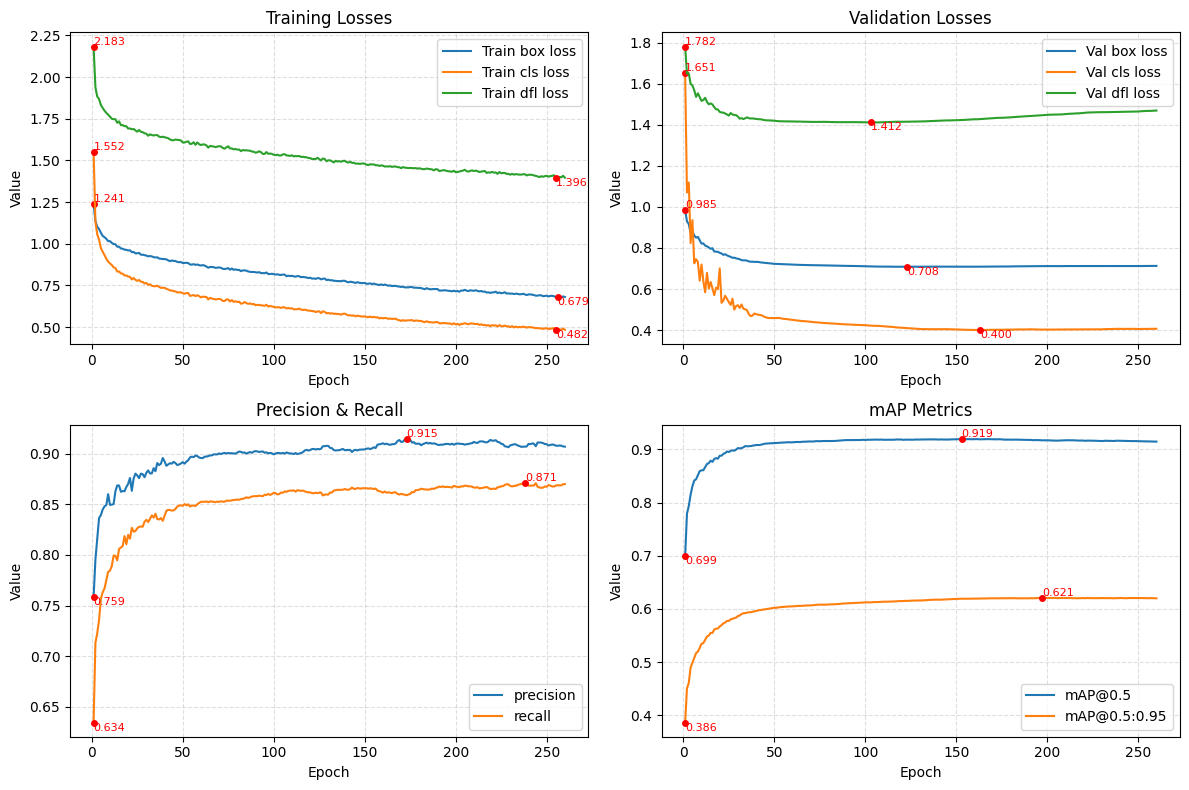

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
CSV_PATH = "/mnt/Data1/mpiccolo/HT_Vision/Training_Results/Stage1/yolo11_ht_vision_fish_stage1_640/results.csv"

# === LOAD DATA ===
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV not found at: {CSV_PATH}")

df = pd.read_csv(CSV_PATH)

# Use epoch if present, otherwise fallback to index
if "epoch" in df.columns:
    x = df["epoch"]
    x_label = "Epoch"
else:
    df["epoch"] = range(len(df))
    x = df["epoch"]
    x_label = "Epoch"

# Helper to pretty-print metric names
def clean_name(col):
    name = col.replace("train/", "Train ")
    name = name.replace("val/", "Val ")
    name = name.replace("metrics/", "")
    name = name.replace("lr/", "LR ")
    name = name.replace("_loss", " loss")
    name = name.replace("mAP50-95", "mAP@0.5:0.95")
    name = name.replace("mAP50", "mAP@0.5")
    name = name.replace("(B)", "")  # YOLO11 sometimes adds (B)
    return name

# Function to add min/max markers
def annotate_min_max(ax, xvals, yvals):
    # Guard against all-NaN or empty
    if yvals.isna().all():
        return

    # Max
    max_idx = yvals.idxmax()
    ax.plot(xvals[max_idx], yvals[max_idx], "ro", markersize=4)
    ax.text(
        xvals[max_idx], yvals[max_idx],
        f"{yvals[max_idx]:.3f}",
        color="red", fontsize=8,
        ha="left", va="bottom"
    )

    # Min
    min_idx = yvals.idxmin()
    ax.plot(xvals[min_idx], yvals[min_idx], "ro", markersize=4)
    ax.text(
        xvals[min_idx], yvals[min_idx],
        f"{yvals[min_idx]:.3f}",
        color="red", fontsize=8,
        ha="left", va="top"
    )

# Helper to safely plot multiple columns on an axis
def plot_columns(ax, columns, title):
    plotted_any = False
    for col in columns:
        if col in df.columns:
            y = df[col]
            ax.plot(x, y, label=clean_name(col))
            annotate_min_max(ax, x, y)
            plotted_any = True

    if plotted_any:
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Value")
        ax.grid(True, linestyle="--", alpha=0.4)
        ax.legend()
    else:
        ax.set_title(title + " (no data)")
        ax.axis("off")


# === DEFINE COMMON YOLO COLUMNS ===
train_loss_cols = [
    "train/box_loss",
    "train/cls_loss",
    "train/dfl_loss",
    "train/seg_loss",      # in case of segmentation
]

val_loss_cols = [
    "val/box_loss",
    "val/cls_loss",
    "val/dfl_loss",
    "val/seg_loss",
]

precision_recall_cols = [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/precision",   # older naming
    "metrics/recall",
]

map_cols = [
    "metrics/mAP50(B)",
    "metrics/mAP50-95(B)",
    "metrics/mAP50",
    "metrics/mAP50-95",
]

# === PLOTTING 2x2 LAYOUT ===
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
(ax1, ax2), (ax3, ax4) = axes

# Top row: train vs val losses
plot_columns(ax1, train_loss_cols, "Training Losses")
plot_columns(ax2, val_loss_cols, "Validation Losses")

# Bottom row: precision/recall and mAP
plot_columns(ax3, precision_recall_cols, "Precision & Recall")
plot_columns(ax4, map_cols, "mAP Metrics")

plt.tight_layout()
plt.show()


## Stage 3 - Training Curves

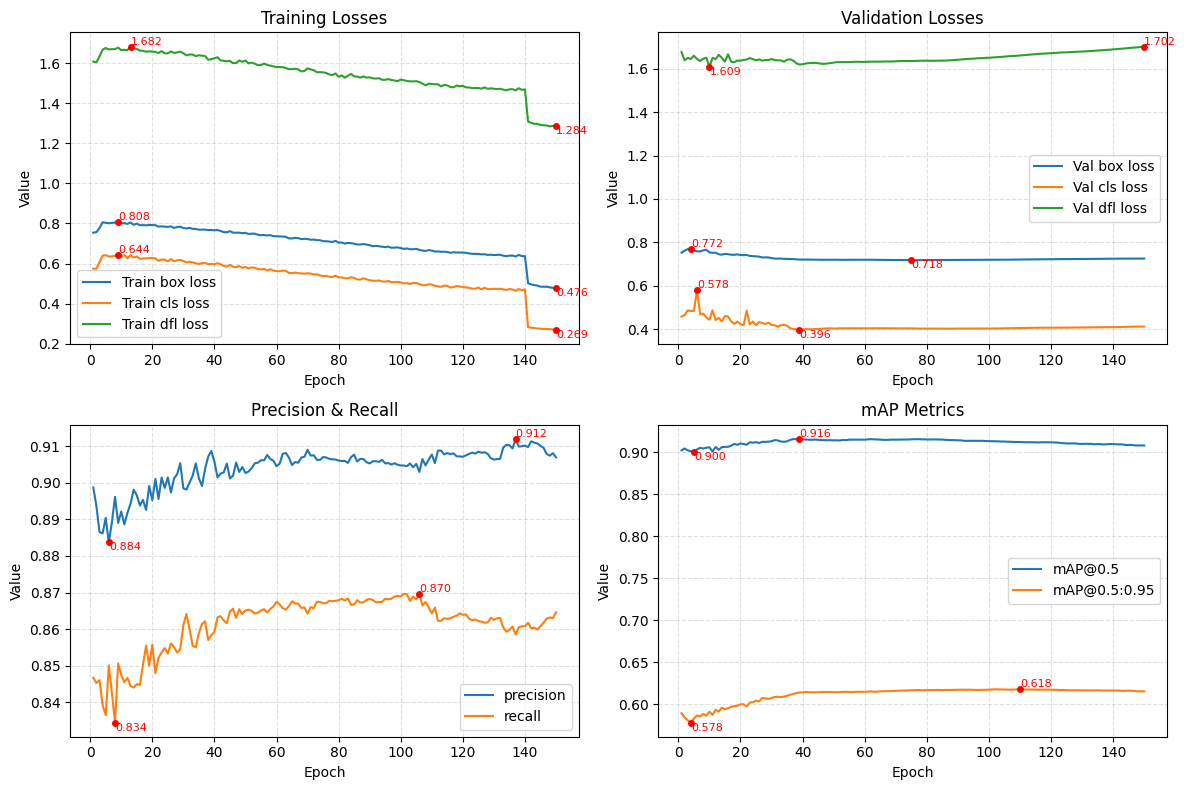

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
CSV_PATH = "/mnt/Data1/mpiccolo/HT_Vision/Training_Results/Stage3/yolo11_ht_vision_fish_stage3_1024/results.csv"

# === LOAD DATA ===
if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV not found at: {CSV_PATH}")

df = pd.read_csv(CSV_PATH)

# Ensure epoch exists
if "epoch" not in df.columns:
    df["epoch"] = range(len(df))

x = df["epoch"]
x_label = "Epoch"

# Helper to pretty-print metric names
def clean_name(col):
    name = col.replace("train/", "Train ")
    name = name.replace("val/", "Val ")
    name = name.replace("metrics/", "")
    name = name.replace("lr/", "LR ")
    name = name.replace("_loss", " loss")
    name = name.replace("mAP50-95", "mAP@0.5:0.95")
    name = name.replace("mAP50", "mAP@0.5")
    name = name.replace("(B)", "")
    return name

# Function to add min/max markers
def annotate_min_max(ax, xvals, yvals):
    # Max
    max_idx = yvals.idxmax()
    ax.plot(xvals[max_idx], yvals[max_idx], "ro", markersize=4)
    ax.text(xvals[max_idx], yvals[max_idx], f"{yvals[max_idx]:.3f}",
            color="red", fontsize=8, ha="left", va="bottom")

    # Min
    min_idx = yvals.idxmin()
    ax.plot(xvals[min_idx], yvals[min_idx], "ro", markersize=4)
    ax.text(xvals[min_idx], yvals[min_idx], f"{yvals[min_idx]:.3f}",
            color="red", fontsize=8, ha="left", va="top")

# Helper to safely plot multiple columns on an axis
def plot_columns(ax, columns, title):
    plotted_any = False
    for col in columns:
        if col in df.columns:
            ax.plot(x, df[col], label=clean_name(col))
            annotate_min_max(ax, x, df[col])
            plotted_any = True

    if plotted_any:
        ax.set_title(title)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Value")
        ax.grid(True, linestyle="--", alpha=0.4)
        ax.legend()
    else:
        ax.set_title(title + " (no data)")
        ax.axis("off")


# === DEFINE YOLO COLUMNS ===
train_loss_cols = ["train/box_loss","train/cls_loss","train/dfl_loss","train/seg_loss"]
val_loss_cols   = ["val/box_loss","val/cls_loss","val/dfl_loss","val/seg_loss"]
precision_recall_cols = [
    "metrics/precision(B)", "metrics/recall(B)",
    "metrics/precision", "metrics/recall",
]
map_cols = ["metrics/mAP50(B)","metrics/mAP50-95(B)","metrics/mAP50","metrics/mAP50-95"]

# === PLOTTING 2×2 ===
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
(ax1, ax2), (ax3, ax4) = axes

plot_columns(ax1, train_loss_cols, "Training Losses")
plot_columns(ax2, val_loss_cols, "Validation Losses")
plot_columns(ax3, precision_recall_cols, "Precision & Recall")
plot_columns(ax4, map_cols, "mAP Metrics")

plt.tight_layout()
plt.show()
